In [79]:
from datasetsforecast.m4 import M4

from statsmodels.tsa.stattools import acf, pacf

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import kpss, range_unit_root_test
import numpy as np
import logging

In [80]:
sns.set_theme(style="whitegrid")
logging.getLogger('matplotlib').setLevel(logging.WARNING)

In [81]:
df_all, *_ = M4.load('./data', 'Hourly')
df_all['ds'] = df_all['ds'].astype(int)

# Just pick out the first few datasets to work with.
n_series = 20
uids = df_all['unique_id'].unique()[:n_series]
df = df_all.query('unique_id in @uids').copy()

df.head()

,unique_id,ds,y
0,H1,1,605.0
1,H1,2,586.0
2,H1,3,586.0
3,H1,4,559.0
4,H1,5,511.0


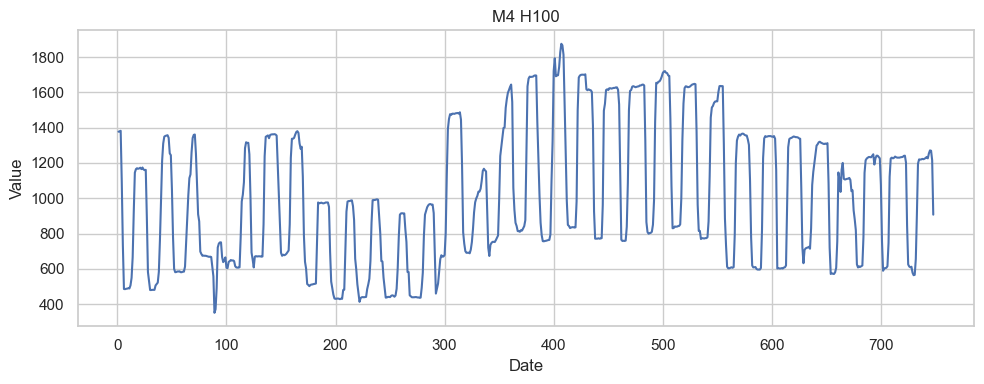

In [82]:
ds = df.query("unique_id == 'H100'").copy()

fig, axs = plt.subplots(1, 1, figsize=(10, 4), sharex=True)

sns.lineplot(ax=axs, data=ds, x='ds', y='y')
axs.set_title('M4 H100')
axs.set_ylabel('Value')

axs.set_xlabel('Date')

plt.tight_layout()
plt.show()

### Differencing
---
We have a time series and wish to make it stationary. What we could do is take the trend and make a new time series.

$$y'_t = y_t - y_{t-1}$$

In backshift notation, it would be this.

$$y'_t = y_t - By_t$$

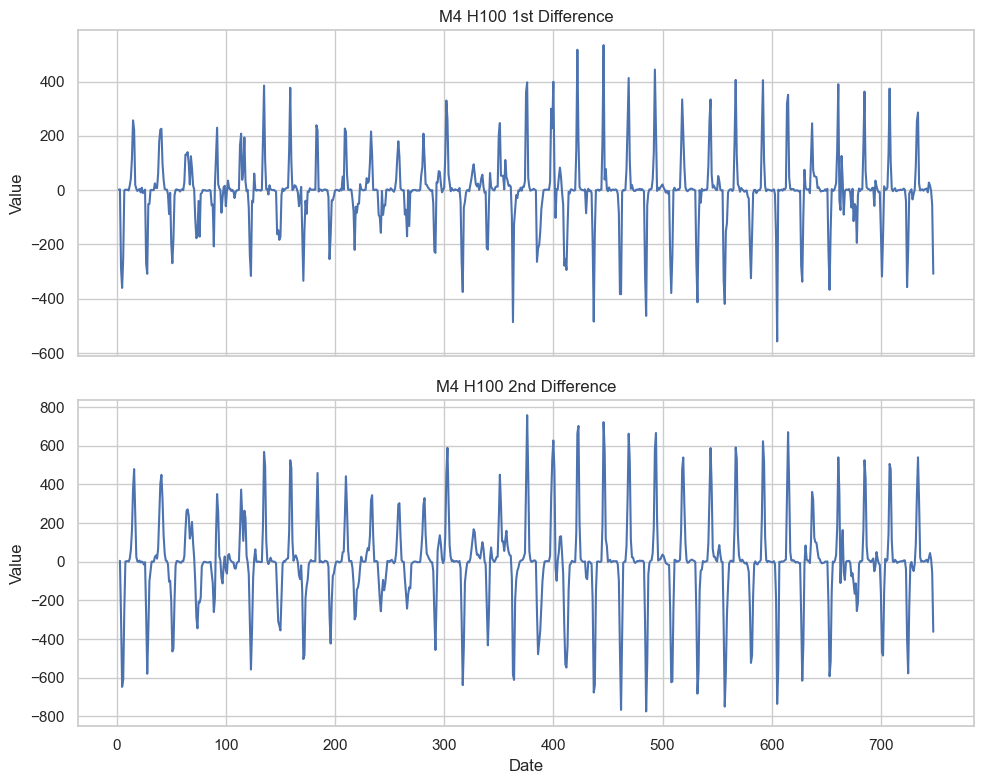

In [83]:
ds['y_diff_1'] = ds['y'].diff(periods=1)
ds['y_diff_2'] = ds['y'].diff(periods=2)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

sns.lineplot(ax=axs[0], data=ds, x='ds', y='y_diff_1')
axs[0].set_title('M4 H100 1st Difference')
axs[0].set_ylabel('Value')

sns.lineplot(ax=axs[1], data=ds, x='ds', y='y_diff_2')

axs[1].set_title('M4 H100 2nd Difference')
axs[1].set_ylabel('Value')

axs[1].set_xlabel('Date')

plt.tight_layout()
plt.show()

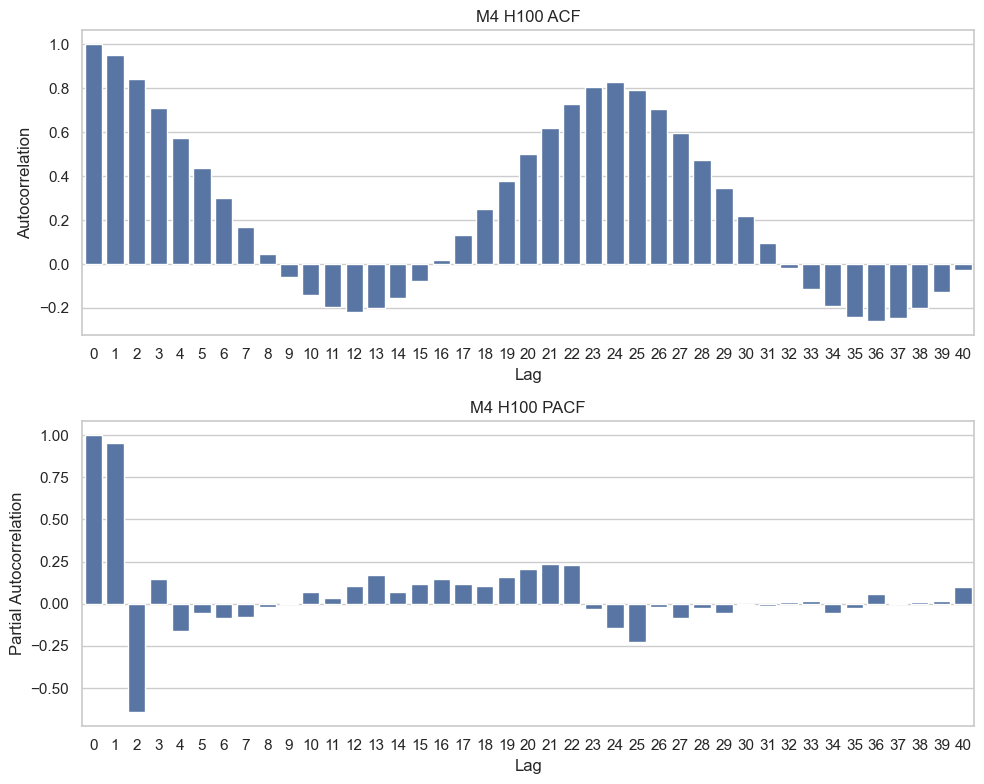

In [84]:
total_lags = 40

acf_values = acf(ds['y'], nlags=total_lags)
pacf_values = pacf(ds['y'], nlags=total_lags)

lags = np.arange(total_lags + 1)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

sns.barplot(ax=axs[0], x=lags, y=acf_values)
axs[0].set_title('M4 H100 ACF')
axs[0].set_ylabel('Autocorrelation')
axs[0].set_xlabel('Lag')

sns.barplot(ax=axs[1], x=lags, y=pacf_values)
axs[1].set_title('M4 H100 PACF')
axs[1].set_ylabel('Partial Autocorrelation')
axs[1].set_xlabel('Lag')

plt.tight_layout()
plt.show()

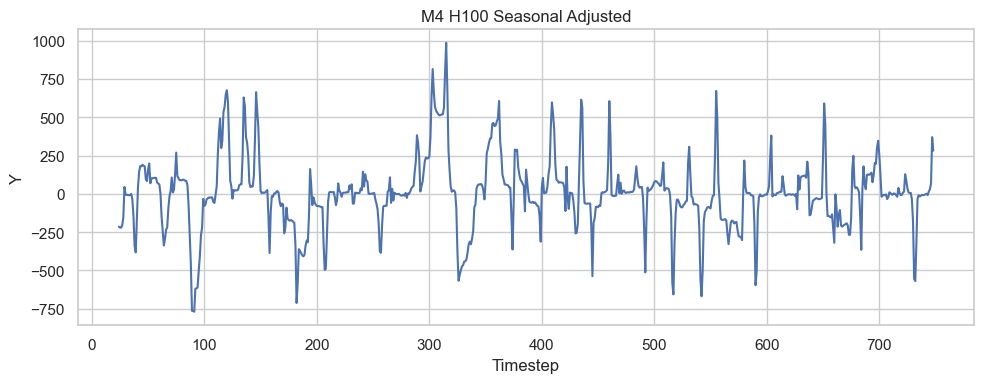

In [85]:
ds['y_season_diff'] = ds['y'].diff(periods=23)

fig, axs = plt.subplots(1, 1, figsize=(10, 4))

sns.lineplot(ax=axs, data=ds, x='ds', y='y_season_diff')
axs.set_title('M4 H100 Seasonal Adjusted')
axs.set_ylabel('Y')
axs.set_xlabel('Timestep')

plt.tight_layout()
plt.show()

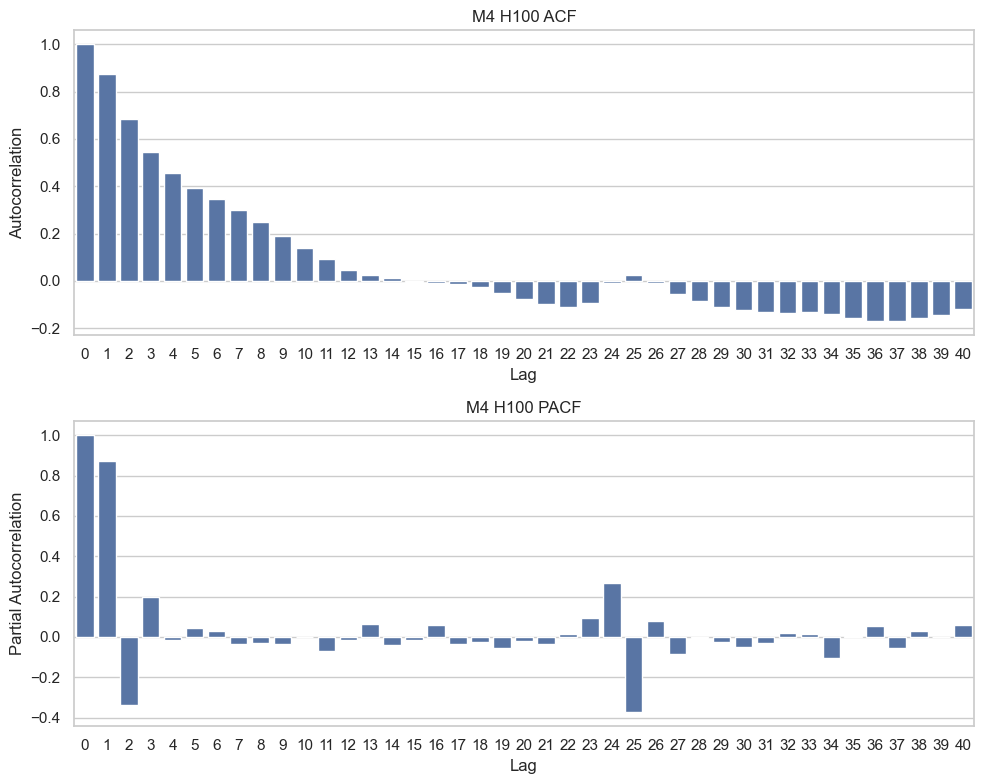

In [86]:
total_lags = 40

acf_values = acf(ds['y_season_diff'].dropna(), nlags=total_lags)
pacf_values = pacf(ds['y_season_diff'].dropna(), nlags=total_lags)

lags = np.arange(total_lags + 1)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

sns.barplot(ax=axs[0], x=lags, y=acf_values)
axs[0].set_title('M4 H100 ACF')
axs[0].set_ylabel('Autocorrelation')
axs[0].set_xlabel('Lag')

sns.barplot(ax=axs[1], x=lags, y=pacf_values)
axs[1].set_title('M4 H100 PACF')
axs[1].set_ylabel('Partial Autocorrelation')
axs[1].set_xlabel('Lag')

plt.tight_layout()
plt.show()

In [88]:
print(kpss(ds['y_season_diff'].dropna()))
print(range_unit_root_test(ds['y_season_diff'].dropna()))

(0.08686443718970795, 0.1, 15, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(0.891337623249849, 0.01, {'10%': 1.41966, '5%': 1.28362, '2.5%': 1.17852, '1%': 1.06524})


C:\Users\Seraph\AppData\Local\Temp\ipykernel_27508\2648924629.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Seraph\AppData\Local\Temp\ipykernel_27508\2648924629.py:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is larger than the p-value returned.


